In [47]:
from __future__ import  division
%matplotlib inline
from data_tools import draw_all_datasets, draw_bar_chart
from data_tools import get_dict_from_file, get_names_from_files
import itertools
import pandas as pd

In [48]:
PATH = "datasets/"
dataset_filenames = {"coco":PATH+"coco.txt", 
                     "voc":PATH+"pascal_voc.txt", 
                     "voc_contex":PATH+"pascal_voc_context.txt", 
                     "cocostuff":PATH+"cocostuff.txt",
                     "citiscapes":PATH+"citiscraper.txt",
                     "ade20k":PATH+"ade20k.txt",
                    "lsvrc_bb":PATH+"LSVRC_bb_2015.txt"}
total_number_of_pictures = {"coco":82783, 
                            "voc":2913, 
                            "voc_contex": 10103, 
                            "cocostuff":82783,
                            "citiscapes":5000,
                            "ade20k": 22210,
                           "lsvrc_bb":534309}

In [49]:
draw_all_datasets(dataset_filenames)

In [50]:
all_objects = {}
for name in dataset_filenames.keys():
    filename = dataset_filenames[name]
    all_objects[name]=get_dict_from_file(filename)
    
all_objects_df = pd.DataFrame(all_objects)
all_objects_df.fillna(0, inplace=True)

In [9]:
total_number_labels = {}
total_number_appearance = {}
for name in dataset_filenames.keys():
    total_number_labels[name] = len(all_objects[name].keys())
    total_number_appearance[name] = sum(all_objects[name].values())


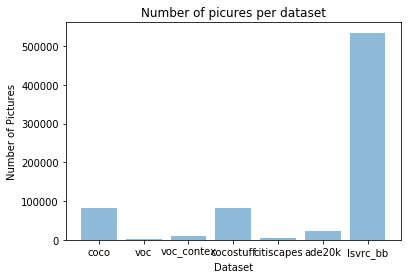

In [10]:
draw_bar_chart(total_number_labels.keys(), total_number_of_pictures.values(), "Number of Pictures", "Dataset", "Number of picures per dataset")

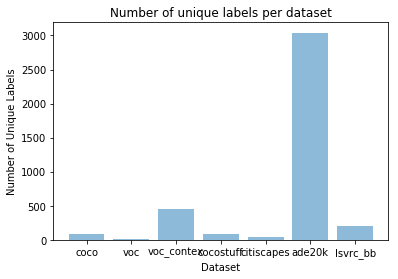

In [11]:
draw_bar_chart(total_number_labels.keys(), total_number_labels.values(), "Number of Unique Labels", "Dataset", "Number of unique labels per dataset")

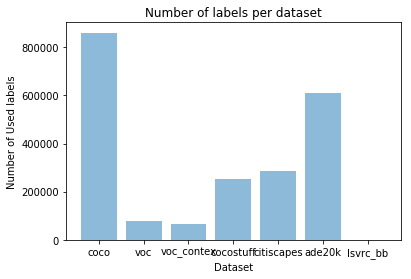

In [12]:
draw_bar_chart(total_number_labels.keys(), total_number_appearance.values(), "Number of Used labels", "Dataset", "Number of labels per dataset")

In [44]:
matrix = pd.DataFrame(columns=dataset_filenames.keys(), index=dataset_filenames.keys())
for d1 in all_objects.keys():
    for d2 in all_objects.keys():
        matrix[d1][d2] = len(set(get_names_from_files(dataset_filenames[d1])).intersection(set(get_names_from_files(dataset_filenames[d2]))))
print("Intresection between datasets")

display(matrix)

Intresection between datasets


,coco,voc,voc_contex,cocostuff,citiscapes,ade20k,lsvrc_bb
coco,80,14,41,0,8,59,28
voc,14,20,19,0,5,16,11
voc_contex,41,19,460,33,15,326,56
cocostuff,0,0,33,92,3,52,1
citiscapes,8,5,15,3,40,23,7
ade20k,59,16,326,52,23,3040,96
lsvrc_bb,28,11,56,1,7,96,201


The matrix above shows the intersection among datasets. TODO: how many images per one intersection.

I would suggest using voc_context, coco, cocostuff and part of ade20k. 
Coco and cocostuff may be used as exclusive datasets.
Voc and Voc_context as subset one of the other.
Voc_context has a large intersection with coco, ade20k, cocostuff.
Ade20K and Voc_context intresects 326/460(for voc_context) labels. 

In [14]:
class_names = []
for d1 in all_objects.keys():
    class_names.extend(all_objects[d1].keys())
class_names = set(class_names)

# Conclusion:
### Total number of uniquie labels through all 6 datasets: 3249
### Total number of pictures: 205792
### Total number of occurrence: 2 156 273


In [20]:
len(unique_set)

3341

In [21]:
all_objects

{'ade20k': {'right leg': 1335,
  'construction equipment': 3,
  'hats': 20,
  'revolving doors': 1,
  'straws': 2,
  'covered bridge': 10,
  'trash can': 950,
  'railing': 1974,
  'elliptical machine': 1,
  'onions': 5,
  'trolley': 81,
  'toilet kit': 3,
  'canes': 6,
  'bed trolley': 2,
  'troller': 1,
  'tree trunk': 13,
  'trousers': 128,
  'plates rack': 1,
  'rock wall': 1,
  'flip flops': 2,
  'slum shanties': 2,
  'kennels': 5,
  'cockpot': 1,
  'exercise machines': 1,
  'blanket': 278,
  'railways': 2,
  'comic strip': 2,
  'vase': 2122,
  'jack': 5,
  'wagons': 2,
  'ciment mixer': 1,
  'fireplace': 508,
  'whisk': 3,
  'shoelace': 1,
  'ridge liles': 1,
  'punching bag': 28,
  'water filter': 1,
  'light bulb': 20,
  'set of instruments': 14,
  'bicycle': 568,
  'quilt': 3,
  'sepulcher': 1,
  'heliport': 1,
  'twigs': 1,
  'tires': 9,
  'satellite dish': 98,
  'chippings': 4,
  'street box': 13,
  'cactus': 56,
  'machines': 4,
  'blouse': 6,
  'paint brush': 7,
  'orchestr

In [22]:
matrix

{('ade20k', 'ade20k'): 3040,
 ('ade20k', 'citiscapes'): 23,
 ('ade20k', 'coco'): 59,
 ('ade20k', 'cocostuff'): 52,
 ('ade20k', 'lsvrc_bb'): 96,
 ('ade20k', 'voc'): 16,
 ('ade20k', 'voc_contex'): 326,
 ('citiscapes', 'ade20k'): 23,
 ('citiscapes', 'citiscapes'): 40,
 ('citiscapes', 'coco'): 8,
 ('citiscapes', 'cocostuff'): 3,
 ('citiscapes', 'lsvrc_bb'): 7,
 ('citiscapes', 'voc'): 5,
 ('citiscapes', 'voc_contex'): 15,
 ('coco', 'ade20k'): 59,
 ('coco', 'citiscapes'): 8,
 ('coco', 'coco'): 80,
 ('coco', 'cocostuff'): 0,
 ('coco', 'lsvrc_bb'): 28,
 ('coco', 'voc'): 14,
 ('coco', 'voc_contex'): 41,
 ('cocostuff', 'ade20k'): 52,
 ('cocostuff', 'citiscapes'): 3,
 ('cocostuff', 'coco'): 0,
 ('cocostuff', 'cocostuff'): 92,
 ('cocostuff', 'lsvrc_bb'): 1,
 ('cocostuff', 'voc'): 0,
 ('cocostuff', 'voc_contex'): 33,
 ('lsvrc_bb', 'ade20k'): 96,
 ('lsvrc_bb', 'citiscapes'): 7,
 ('lsvrc_bb', 'coco'): 28,
 ('lsvrc_bb', 'cocostuff'): 1,
 ('lsvrc_bb', 'lsvrc_bb'): 201,
 ('lsvrc_bb', 'voc'): 11,
 ('lsvr

In [27]:
[len(get_names_from_files(dataset_filenames[i])) for i in dataset_filenames.keys()]

[80, 20, 460, 92, 40, 3040, 201]

In [25]:
dataset_filenames.keys()

dict_keys(['coco', 'voc', 'voc_contex', 'cocostuff', 'citiscapes', 'ade20k', 'lsvrc_bb'])

,ade20k,citiscapes,coco,cocostuff,lsvrc_bb,voc,voc_contex
-,1.0,0.0,0.0,0.0,0.0,0.0,0.0
abacus,1.0,0.0,0.0,0.0,0.0,0.0,0.0
accordion,1.0,0.0,0.0,0.0,0.0,0.0,2.0
acropolis,11.0,0.0,0.0,0.0,0.0,0.0,0.0
adding machine,2.0,0.0,0.0,0.0,0.0,0.0,0.0
advertisement,71.0,0.0,0.0,0.0,0.0,0.0,0.0
aerial,180.0,0.0,0.0,0.0,0.0,0.0,0.0
aeroplane,0.0,0.0,0.0,0.0,0.0,2004.0,597.0
air conditioner,0.0,0.0,0.0,0.0,0.0,0.0,5.0
air conditioning,582.0,0.0,0.0,0.0,0.0,0.0,0.0
